In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
### make_hist 함수
### 입력: grayscale 이미지
### 출력: histogram 배열
### 기능 grayscale 이미지를 입력받아 histogram [0~255]을 계산하고 return 해주는 함수

def make_hist(image):
    
    #입력 영상이 None이거나 3차원(h, w, c)이면 assert
    assert len(image.shape) == 2, "grayscale 영상을 입력해주세요."
    
    #변수 선언
    histogram = np.zeros((256), dtype=np.int32) # 0~255값을 저장할 array 생성(0으로 초기화)
    h, w = image.shape
    
    #모든 픽셀을 탐색하며 histogram 계산
    for i in range(h):
        for j in range(w):
            value = image[i,j]
            histogram[value] += 1
    
    return histogram

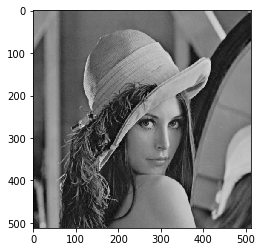

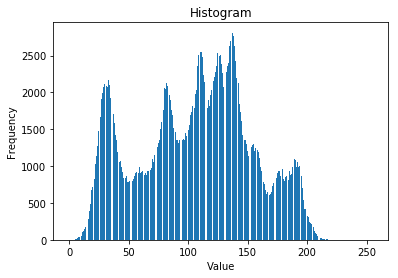

In [5]:
# 영상 불러오기
lena = cv2.imread("./practice3/lena.png", 0)
plt.imshow(lena, cmap='gray', vmin=0, vmax=255)

# 히스토그램 계산하고 그리기
plt.figure()
lena_hist = make_hist(lena)

x = np.arange(256) # 0~255
plt.bar(x, height=lena_hist) # 막대그래프 그리기

plt.title("Histogram")
plt.xlabel("Value") # 밝기값
plt.ylabel("Frequency") # 도수(발생빈도)
plt.show()

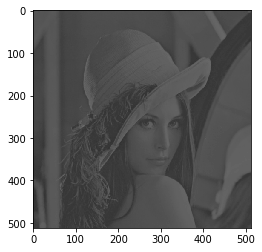

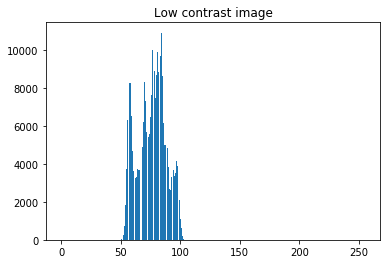

In [6]:
#저대비(low constrast) 영상 불러오기
lena_before = cv2.imread("./practice3/lena_low.png", 0)
h, w = np.shape(lena_before)
plt.imshow(lena_before, cmap='gray', vmin=0, vmax=255)

# 저대비 영상의 히스토그램 출력
plt.figure()
lena_hist = make_hist(lena_before)
x = np.arange(256) #0~255
plt.bar(x, height=lena_hist) # 막대그래프 그리기
plt.title("Low contrast image")
plt.show()

In [7]:
# 노이즈에 강건한 최소, 최대 밝기 계산
# (픽셀 개수 5% 미만까지는 skip)

max_value = 0
min_value = 255

sum_low = 0
sum_high = 0
num_pixel = w * h # 픽셀 개수

for i in np.arange(0,256,1):
    freq = lena_hist[i]
    sum_low += freq
    if sum_low > num_pixel * 0.05:
        min_value = i
        break

for i in np.arange(255,-1,-1):
    freq = lena_hist[i]
    sum_high += freq
    if sum_high > num_pixel * 0.05:
        max_value = i
        break

print("최소 밝기:", min_value)
print("최대 밝기:", max_value)

최소 밝기: 57
최대 밝기: 96


In [8]:
#slope 계산
slope = 255 / (max_value - min_value)
print("slope:", slope)
print("(max-min)*slope:", (max_value - min_value) * slope)

# histogram streching 수행
lena_after = np.zeros((h, w), dtype=np.uint8)

for i in range(h):
    for j in range(w):
        value = lena_before[i,j]
        
        if value < min_value:
            lena_after[i,j] = 0
        elif value > max_value:
            lena_after[i,j] = 255
        else:
            lena_after[i,j] = np.uint8((value - min_value) * slope)

slope: 6.538461538461538
(max-min)*slope: 255.0


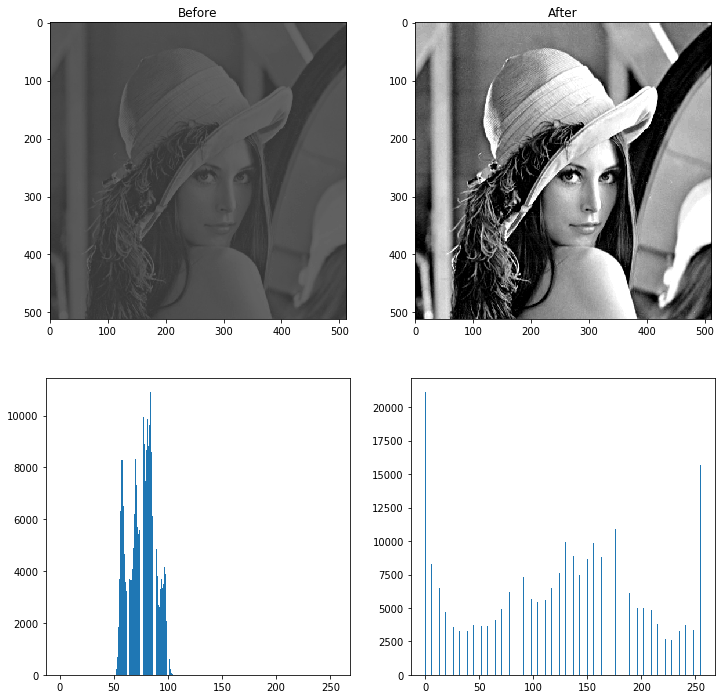

In [9]:
# 결과 영상 출력
plt.figure(figsize=(12,12)) #출력 크기 조절

plt.subplot(2,2,1)
plt.title("Before")
plt.imshow(lena_before, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,2)
plt.title("After")
plt.imshow(lena_after, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,3)
before_hist = make_hist(lena_before)
x = np.arange(256) # 0~ 255
plt.bar(x, height=before_hist) #막대그래프 그리기

plt.subplot(2,2,4)
after_hist = make_hist(lena_after)
x = np.arange(256) #0~255
plt.bar(x, height=after_hist) # 막대그래프 그리기

plt.show()

In [29]:
# 저대비(low constrast) 영상 불러오기
lena_before = cv2.imread("./practice3/lena_low.png", 0)
h, w = np.shape(lena_before)

lena_after = np.zeros((h,w), dtype=np.uint8)

# 한 칸에 얼마의 값이 들어가야 하는지
unit = h * w / 256
print("영상 크기:", h, w)
print("unit:", unit)

# 히스토그램 계산
lena_hist = make_hist(lena_before)

# 변환 함수 만들기
T = np.zeros(256)
hist_sum = 0
for i in range(256):
    hist_sum += lena_hist[i]
    T[i] = np.uint8(hist_sum / unit)

print("T:", T)

# Equalization 수행
for i in range(h):
    for j in range(w):
        value = lena_before[i,j]
        lena_after[i,j] = T[value] # 기본 밝기값 value가 H를 통해 매핑됨

영상 크기: 512 512
unit: 1024.0
T: [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.   6.
  12.  20.  28.  35.  39.  43.  46.  49.  53.  56.  60.  64.  69.  75.
  83.  90.  95. 101. 106. 112. 120. 130. 138. 146. 154. 164. 172. 182.
 192. 201. 207. 212. 216. 221. 225. 228. 230. 233. 237. 240. 244. 248.
 252. 254. 255. 255. 255. 255. 255. 255.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 

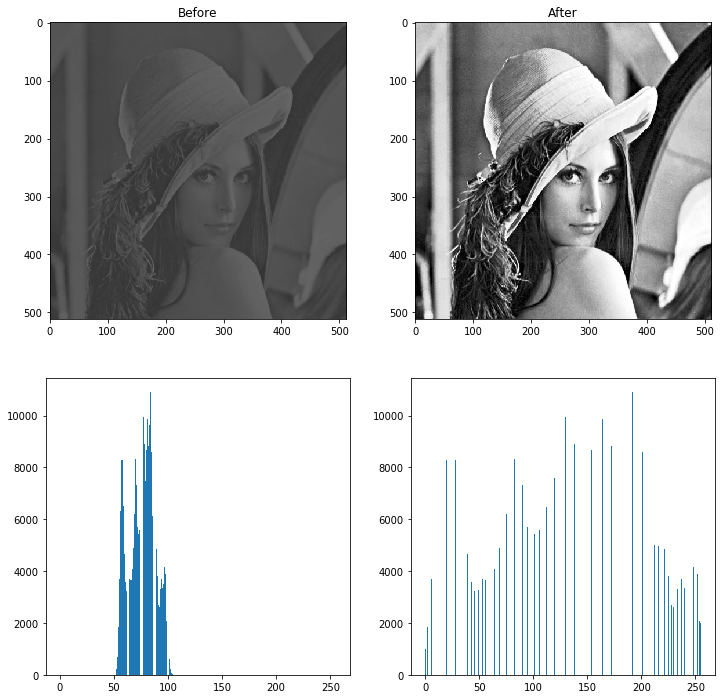

In [31]:
# 결과 영상 출력
plt.figure(figsize=(12,12)) # 출력 크기 조절

plt.subplot(2,2,1)
plt.title("Before")
plt.imshow(lena_before, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,2)
plt.title("After")
plt.imshow(lena_after, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,3)
before_hist = make_hist(lena_before)
x = np.arange(256) #0~255
plt.bar(x, height=before_hist) #막대그래프 그리기

plt.subplot(2,2,4)
after_hist = make_hist(lena_after)
x = np.arange(256) # 0~255
plt.bar(x, height=after_hist) # 막대그래프 그리기

plt.show()

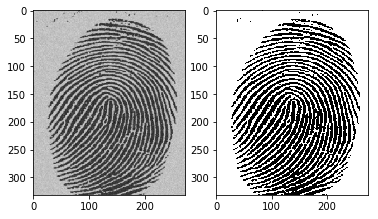

In [32]:
f_image = cv2.imread("./practice3/finger_print.png", 0)
h,w = np.shape(f_image)

thresh_image = np.zeros((h,w), dtype=np.uint8)

#임계값 설정
thresh_value = 120

for i in range(h):
    for j in range(w):
        if f_image[i,j] >= thresh_value:
            thresh_image[i,j] = 255
        else:
            thresh_image[i,j] = 0

plt.figure()
plt.subplot(1,2,1)
plt.imshow(f_image, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.imshow(thresh_image, cmap='gray', vmin=0, vmax=255)

Otsu 알고리즘이 찾아낸 임계치: 127.0


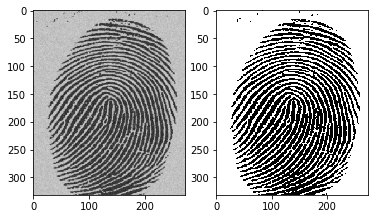

In [35]:
#Otsu's method 적용
f_t_image = cv2.imread("./practice3/finger_print.png", 0)
th, thresh_image = cv2.threshold(f_t_image, 0, 255, cv2.THRESH_OTSU)

print("Otsu 알고리즘이 찾아낸 임계치:", th)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(f_t_image, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.imshow(thresh_image, cmap='gray', vmin=0, vmax=255)

Otsu 알고리즘이 찾아낸 임계치: 74.0


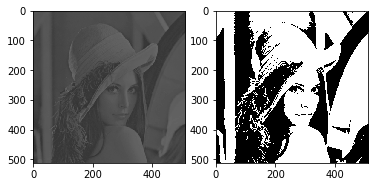

In [36]:
#Otsu's method 적용
f_t_image = cv2.imread("./practice3/lena_low.png", 0)
th, thresh_image = cv2.threshold(f_t_image, 0, 255, cv2.THRESH_OTSU)

print("Otsu 알고리즘이 찾아낸 임계치:", th)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(f_t_image, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.imshow(thresh_image, cmap='gray', vmin=0, vmax=255)